In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##What is Exploratory Data Analysis ?
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations

##Uploading the file

In [2]:
from google.colab import files
uploaded = files.upload()

Saving zomato.csv to zomato.csv


In [3]:
df = pd.read_csv('zomato.csv')
df.head()

UnicodeDecodeError: ignored

Error if encoding is not provided :
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7044: invalid continuation byte

In [4]:
df = pd.read_csv('zomato.csv', encoding ="latin-1")
df.head()
#what are encodings

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Encoding by default is "utf-8"
[List of various python encodings](https://docs.python.org/3/library/codecs.html#standard-encodings)

In [5]:
df.info( )
#object -> can be categorical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

info() does not return any value. It just prints the information.

In [6]:
df.info(verbose = False)
#we get a short summary if we set verbose parameter to false
#by default it is true

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Columns: 21 entries, Restaurant ID to Votes
dtypes: float64(3), int64(5), object(13)
memory usage: 1.5+ MB


In [7]:
df.info(show_counts = False)
#show_counts parameter by default is true it shows the number of rows with non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Restaurant ID         int64  
 1   Restaurant Name       object 
 2   Country Code          int64  
 3   City                  object 
 4   Address               object 
 5   Locality              object 
 6   Locality Verbose      object 
 7   Longitude             float64
 8   Latitude              float64
 9   Cuisines              object 
 10  Average Cost for two  int64  
 11  Currency              object 
 12  Has Table booking     object 
 13  Has Online delivery   object 
 14  Is delivering now     object 
 15  Switch to order menu  object 
 16  Price range           int64  
 17  Aggregate rating      float64
 18  Rating color          object 
 19  Rating text           object 
 20  Votes                 int64  
dtypes: float64(3), int64(5), object(13)
memory usage: 1.5+ MB


In [8]:
df.describe()
#returns a dataframe  or a series depending on what is provided

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [9]:
df.describe(exclude = ['float' , 'string' , 'object'])
#In exclude parameter we can pass a list of data types which we don't want the information about

,Restaurant ID,Country Code,Average Cost for two,Price range,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,1199.210763,1.804837,156.909748
std,8.791521e+06,56.750546,16121.183073,0.905609,430.169145
min,5.300000e+01,1.000000,0.000000,1.000000,0.000000
25%,3.019625e+05,1.000000,250.000000,1.000000,5.000000
50%,6.004089e+06,1.000000,400.000000,2.000000,31.000000
75%,1.835229e+07,1.000000,700.000000,2.000000,131.000000
max,1.850065e+07,216.000000,800000.000000,4.000000,10934.000000


##all things to do


1.   Find missing values
2.   Explore about numerical variables
3. explore about categorical variables
4. Find relationships between features




Finding null values

In [10]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

<Axes: >

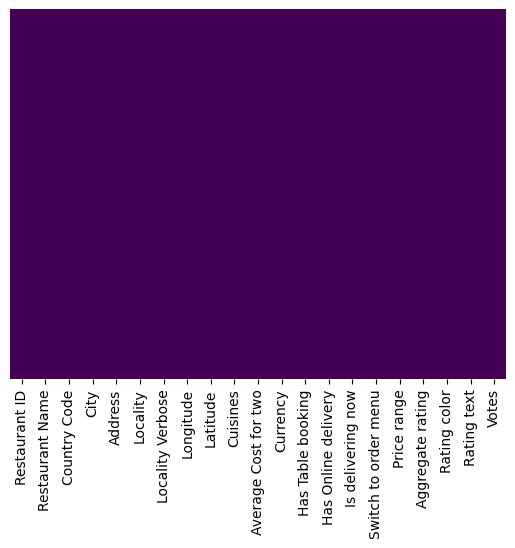

In [11]:
sns.heatmap(df.isnull() , yticklabels = False ,cbar = False ,cmap = 'viridis'  )
#for checking the heatmap of null values to see if there are more nullvalues
#we don't have anything on y axis hence we have set yticklabels as False
#viridis is a name of the color mapping

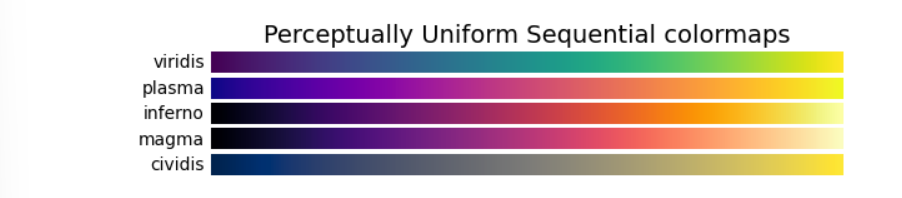

In [12]:
from google.colab import files
uploaded = files.upload()

Saving Country-Code.xlsx to Country-Code.xlsx


In [13]:
df_country = pd.read_excel('Country-Code.xlsx')
df_country.head()
#head() returns first 5 entries of each column of dataframe by default

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [14]:
df_country.tail()
#tail() returns last 5 entries of each column of dataframe by default

,Country Code,Country
10,191,Sri Lanka
11,208,Turkey
12,214,UAE
13,215,United Kingdom
14,216,United States


We need to merge both of these dataframes into a single dataframe



In [15]:
final_df = pd.merge(df,df_country, on = 'Country Code' , how = 'left')
final_df
#returns dataframe
#on is basically the common feature in both the dataframes using which you want to combine the dataframes
#in these two dataframes we have a common column named 'country code'
#how has three values which we can pass : left , right and inner
#as our primary focus is the dataframe df which contains all the infomration we merged it as left

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [22]:
final_df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

value_counts()
Return a Series containing counts of unique rows in the DataFrame

It returns information in descending order

In [19]:
country_names = final_df.Country.value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [20]:
country_val = final_df.Country.value_counts().values
country_val

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

## Finding top 3 countries using zomato and visualising it through pie chart

([<matplotlib.patches.Wedge at 0x7c4b12047dc0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')])

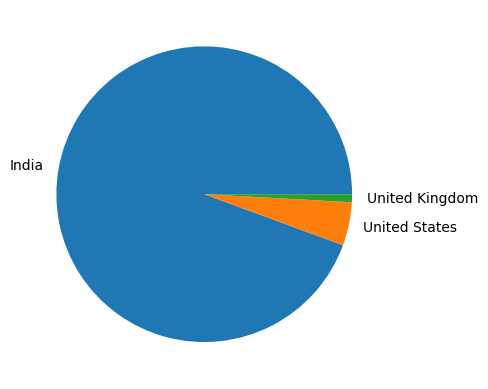

In [23]:
plt.pie(country_val[:3] , labels = country_names[:3])

([<matplotlib.patches.Wedge at 0x7c4b10a0f010>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

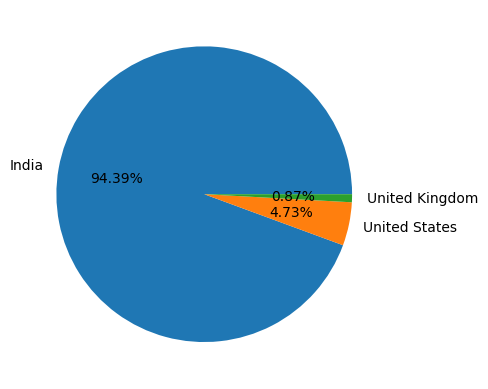

In [37]:
#adding percentage to pie chart using autopct parameter
plt.pie(country_val[:3] , labels = country_names[:3] , autopct = "%1.2f%%")

# % -> required
# 1.2f -> format you can use d for integer values here 1.2 says float value upto 2 decimal places
#%% -> required

### Observation
Zomato has most number of orders from India followed by UK and USA

In [38]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [46]:
ratings = final_df.groupby(['Aggregate rating' , 'Rating color' ,'Rating text']).size().reset_index().rename(columns = {0 : 'Rating Count'})
ratings
#research more about groupby function

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


##Observation
1. When rating is between 4.5 - 4.9 --> excellent
2. When rating are between 4.0 to 4.3 --> Very Good
3. When rating are between 3.5 to 3.9 --> Good
4. When rating are between 2.5 to 3.4 --> Average
5. When rating are between 1.8 to 2.4 --> Poor
6. O ratings means user has not rated

In [47]:
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

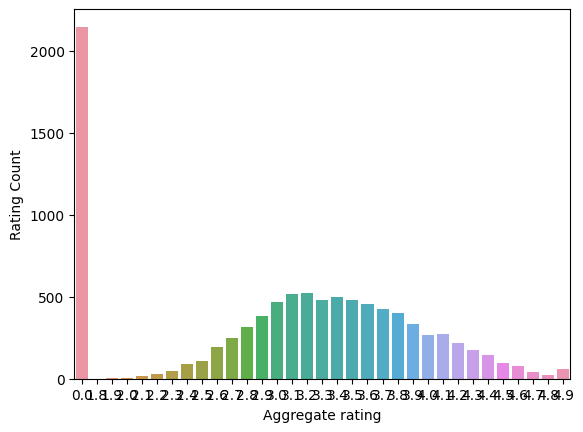

In [51]:
sns.barplot(x = "Aggregate rating" , y = "Rating Count" , data = ratings)
#this is looking crowded on the x axis

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

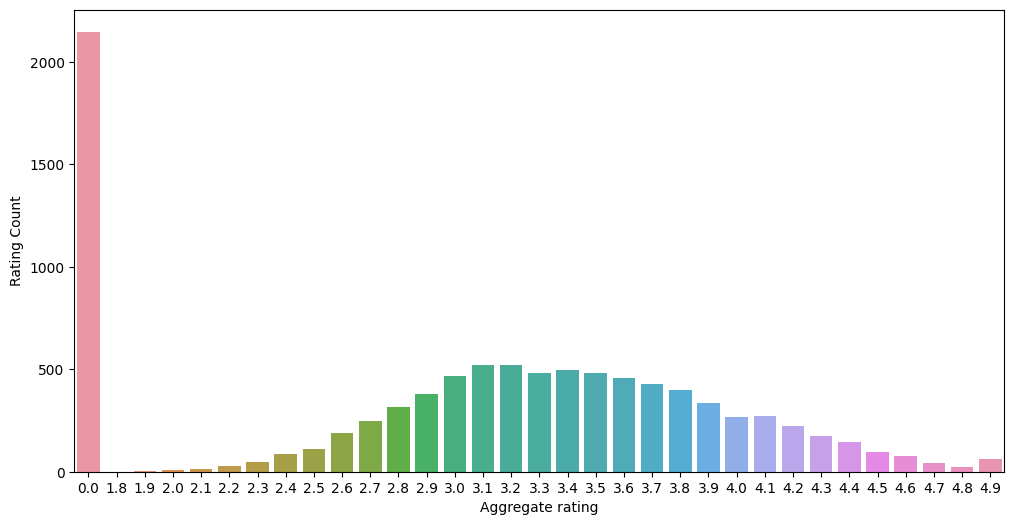

In [52]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x = "Aggregate rating" , y = "Rating Count" , data = ratings)
#following plot resembles a guassian curve except the unrated observations

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

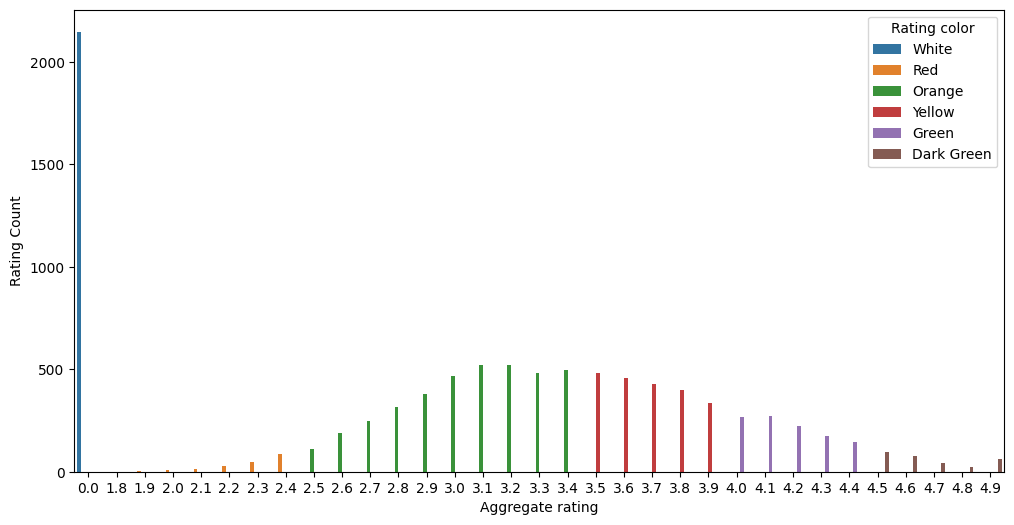

In [53]:
#coloring this graph as per the data using hue parameter
plt.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x = "Aggregate rating" , y = "Rating Count" , data = ratings , hue = 'Rating color')
#mapped colors are not matching with the given data
#they are not mapped

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

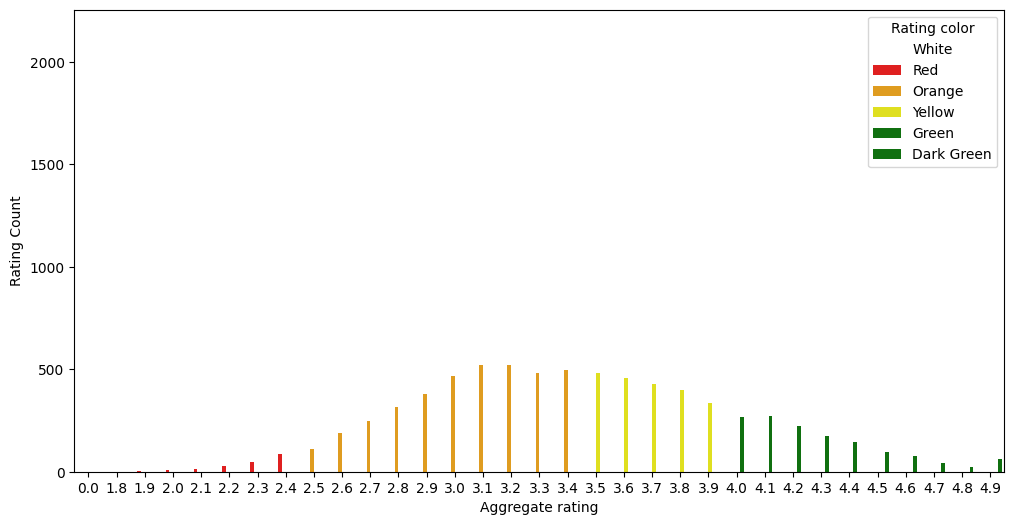

In [57]:
#coloring this graph as per the data using palette parameter
plt.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x = "Aggregate rating" , y = "Rating Count" , data = ratings , hue = 'Rating color' , palette = ['White' , 'Red' , 'Orange' , 'Yellow' ,'Green','Green'])

##Countries which have given most 0 ratings

In [58]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [67]:
country_unrated_count = final_df[final_df['Rating color'] == 'White'].groupby(['Aggregate rating' , 'Rating color' , 'Country']).size().reset_index().rename(columns = {0 : 'Rating Count'})

<Axes: xlabel='Country', ylabel='Rating Count'>

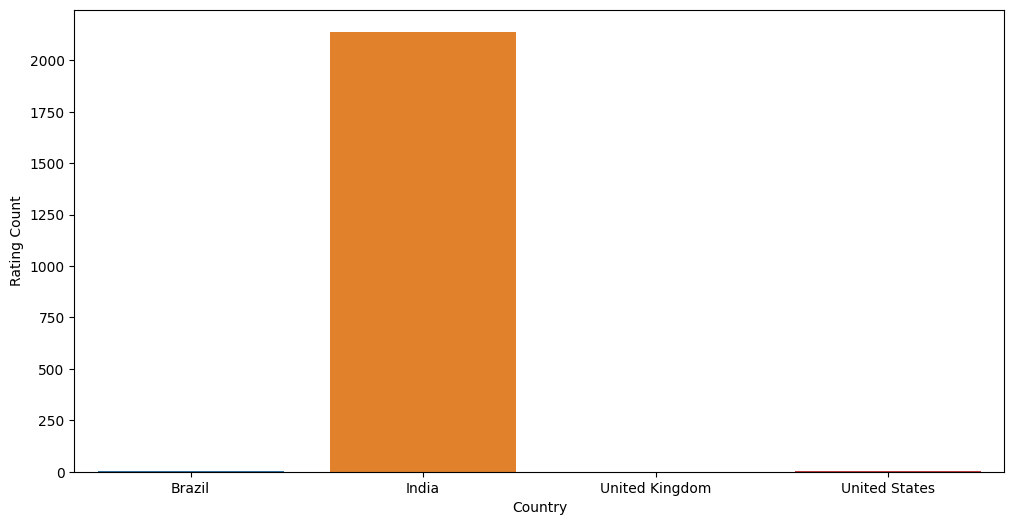

In [68]:
sns.barplot(x = "Country" , y = "Rating Count" , data = country_unrated_count)

## Which cities in India has most orders

In [81]:
Indian_cities = final_df[final_df['Country'] == 'India']
Indian_cities.City.value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Amritsar          21
Pune              20
Puducherry        20
Patna             20
Ludhiana          20
Ranchi            20
Surat             20
Vadodara          20
Nashik            20
Nagpur            20
Mysore            20
Mumbai            20
Varanasi          20
Mangalore         20
Agra              20
Kochi             20
Kolkata           20
Dehradun          20
Allahabad         20
Aurangabad        20
Bangalore         20
Bhopal            20
Chennai           20
Coimbatore        20
Goa               20
Indore            20
Jaipur            20
Kanpur            20
Vizag             20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Panchkula          1
Mohali             1
Name: City, dtype: int64

In [82]:
city_names = Indian_cities.City.value_counts().index

In [83]:
city_count_orders = Indian_cities.City.value_counts().values
city_count_orders

array([5473, 1118, 1080,  251,   25,   21,   21,   21,   21,   21,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   18,   18,    2,    1,    1])

([<matplotlib.patches.Wedge at 0x7c4b0ca0fe80>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

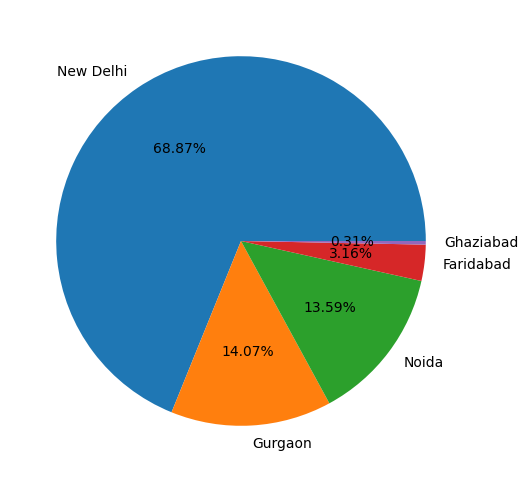

In [85]:
plt.pie(city_count_orders[:5] , labels = city_names[:5] , autopct = "%1.2f%%")

## Finding top 10 cuisines


In [86]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [92]:
cuisine_name = final_df.Cuisines.value_counts().index

In [90]:
cuisine_count = final_df.Cuisines.value_counts().values

([<matplotlib.patches.Wedge at 0x7c4b0c8a6080>,
 [Text(0.7383739846958008, 0.8153550507137645, 'North Indian'),
  Text(-0.5794679314239953, 0.9349956772366362, 'North Indian, Chinese'),
  Text(-1.067309479615702, 0.26617752482593154, 'Chinese'),
  Text(-1.0185984499802057, -0.4152796620326146, 'Fast Food'),
  Text(-0.5935788454809928, -0.9261015895664212, 'North Indian, Mughlai'),
  Text(-0.005887079599915552, -1.0999842463843672, 'Cafe'),
  Text(0.4842062514572988, -0.9876964645323336, 'Bakery'),
  Text(0.808736477166136, -0.7456174022251013, 'North Indian, Mughlai, Chinese'),
  Text(1.0055375294202338, -0.44597564611473206, 'Bakery, Desserts'),
  Text(1.090298995560443, -0.14576728123927227, 'Street Food')],
 [Text(0.4027494461977095, 0.4447391185711442, '26.58%'),
  Text(-0.316073417140361, 0.5099976421290743, '14.51%'),
  Text(-0.5821688070631101, 0.14518774081414446, '10.05%'),
  Text(-0.5555991545346576, -0.22651617929051704, '10.05%'),
  Text(-0.32377027935326874, -0.50514632158

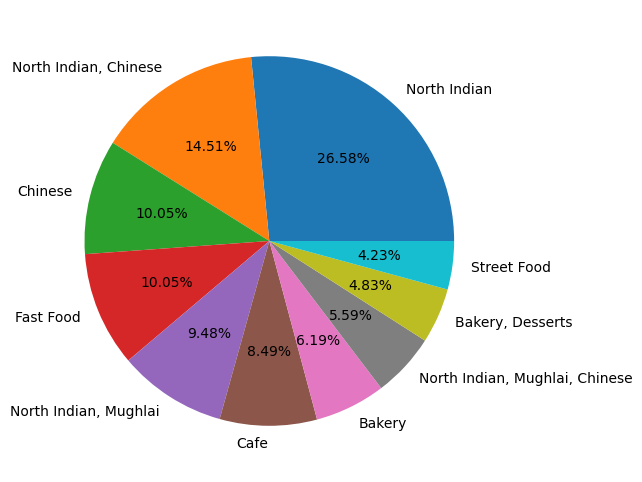

In [93]:
plt.pie(cuisine_count[:10] , labels = cuisine_name[:10] , autopct = "%1.2f%%")

This tells that we need to clean data to get the exact details about top 10 cuisines